In [60]:
setwd('/import/DB/fel/BJTC-204')

In [61]:
load('./exp4.rda')

In [62]:
library(dplyr)

In [63]:
dim(exp4)

[1]   251 11882

In [64]:
expr = exp4[,8:11882]

colnames(expr) = gsub('-','.',colnames(expr))
expr <- expr[, !grepl("^\\d+", names(expr))]

In [65]:
expr1 = expr%>%  t() %>%  as.data.frame()

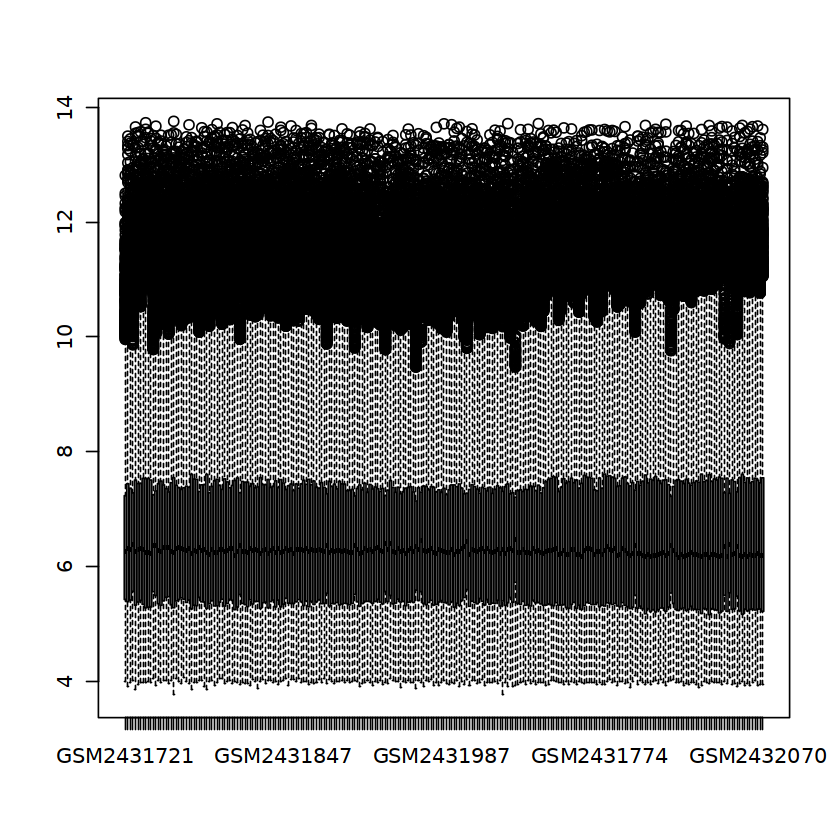

In [66]:
boxplot(expr1)

In [67]:
TYPE = exp4$TYPE

In [68]:
library(limma)
library(dplyr)
f <- TYPE %>% as.factor()

In [69]:
TYPE

[1] "Control" "Control" "Control" "Control" "Control" "MDD"     "MDD"    
  [8] "Control" "MDD"     "Control" "Control" "Control" "Control" "Control"
 [15] "Control" "Control" "MDD"     "Control" "Control" "MDD"     "Control"
 [22] "MDD"     "Control" "Control" "MDD"     "Control" "Control" "Control"
 [29] "Control" "Control" "MDD"     "MDD"     "Control" "Control" "Control"
 [36] "MDD"     "MDD"     "Control" "Control" "Control" "Control" "Control"
 [43] "MDD"     "Control" "Control" "MDD"     "Control" "MDD"     "Control"
 [50] "Control" "Control" "MDD"     "Control" "MDD"     "Control" "Control"
 [57] "MDD"     "Control" "MDD"     "MDD"     "Control" "Control" "Control"
 [64] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
 [71] "Control" "Control" "Control" "MDD"     "Control" "MDD"     "MDD"    
 [78] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
 [85] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
 [92] "Control" "MDD"     "MDD"     "MDD"     "Control" "Control" "Control"
 [99] "Control" "Control" "Control" "MDD"     "Control" "Control" "Control"
[106] "MDD"     "Control" "MDD"     "Control" "Control" "MDD"     "Control"
[113] "Control" "Control" "Control" "Control" "Control" "MDD"     "MDD"    
[120] "Control" "Control" "Control" "Control" "MDD"     "MDD"     "Control"
[127] "Control" "Control" "Control" "Control" "Control" "MDD"     "Control"
[134] "MDD"     "Control" "MDD"     "MDD"     "Control" "Control" "Control"
[141] "Control" "MDD"     "MDD"     "Control" "Control" "MDD"     "MDD"    
[148] "Control" "MDD"     "MDD"     "MDD"     "Control" "Control" "Control"
[155] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[162] "MDD"     "Control" "MDD"     "MDD"     "Control" "Control" "Control"
[169] "Control" "Control" "Control" "Control" "MDD"     "MDD"     "MDD"    
[176] "MDD"     "MDD"     "Control" "Control" "Control" "Control" "Control"
[183] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[190] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[197] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[204] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[211] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[218] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[225] "Control" "Control" "Control" "MDD"     "MDD"     "MDD"     "MDD"    
[232] "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"    
[239] "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"    
[246] "MDD"     "MDD"     "MDD"     "MDD"     "MDD"     "MDD"

In [70]:

desigN <- model.matrix(~ 0 + f)
colnames(desigN) <- levels(f)
fit = lmFit(expr1, desigN)
contrast.matrix <- makeContrasts(MDD - Control, levels = colnames(coef(fit)))
contrast.matrix 

,MDD - Control
Control,-1
MDD,1


In [71]:
fit2 <- contrasts.fit(fit, contrast.matrix) 
fit2 <- eBayes(fit2) 
tempOutput <- topTable(fit2,coef=1,n=Inf,adjust="BH")
head(tempOutput)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABCB1,-0.2839770,6.005474,-4.872578,1.948925e-06,0.009930851,4.647776
ACTL6B,0.2169517,7.269066,4.848878,2.174330e-06,0.009930851,4.549711
BAIAP3,0.2118200,7.863907,4.773676,3.068822e-06,0.009930851,4.241148
AMACR,0.1187159,5.627822,4.754423,3.349642e-06,0.009930851,4.162786
NEK3,-0.1537715,5.395802,-4.511597,9.873293e-06,0.022932798,3.197057
GDAP1L1,0.1834913,6.923185,4.401889,1.586102e-05,0.022932798,2.774676


In [72]:
diff <- 
  tempOutput %>% 
  mutate(change = as.factor(ifelse(P.Value		 < 0.05 & abs(logFC) > 0.2,
                                   ifelse(logFC > 0.2 ,'Up','Down'),'NOT'))) 
diff$gene = rownames(diff)

In [73]:
table(diff$change)


 Down   NOT    Up 
  109 11374   376 

In [74]:
library(ggplot2)
library(ggpubr)
library(ggrepel)
library(cowplot)

In [75]:
top_5 <- bind_rows(   
      diff %>%
        filter(gene  %in% c('CNIH3','OTUD4','MUS81','UCK2')) %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0),
      diff %>%
        filter(gene  %in% c()) %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0)
    )

Warning message:
"Removed 42 rows containing missing values or values outside the scale range
(`geom_point()`)."


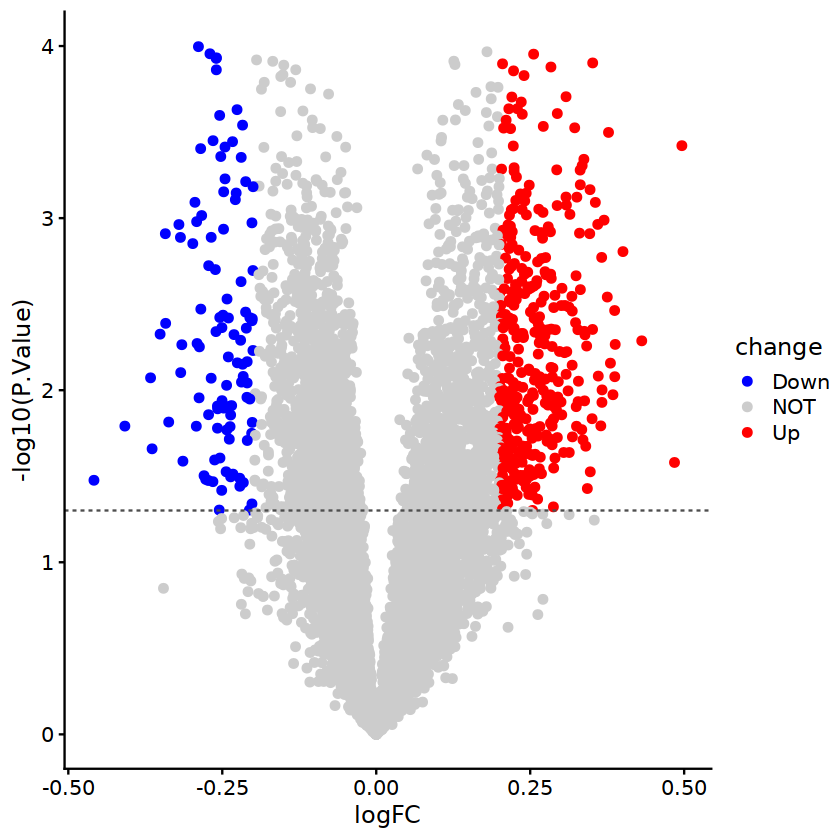

In [76]:
    ggplot(data=diff,aes(x=logFC,y=-log10(P.Value)))+
    geom_point(aes(color=change),size=2)+
    geom_hline(yintercept = -log10(0.05), linetype="dashed",color="grey30")+
    #geom_vline(xintercept = c(-0.3,0.3),linetype="dashed",color="grey30")+
    geom_text_repel(data=top_5,aes(x= logFC,y= -log10(P.Value),label= rownames(top_5)))+
    scale_color_manual(values = c("blue","grey80","red"))+
    theme_half_open() +ylim(0,4)#+xlim(-1.5,1.5)

In [83]:
gene2 = tempOutput %>% filter(P.Value< 0.05 & abs(logFC) > 0.3) %>%  rownames()

In [84]:
length(gene2)

[1] 85

In [85]:
tempOutput1 = tempOutput %>%  dplyr::filter(P.Value< 0.05 & abs(logFC) > 0.3)

write.csv(tempOutput1,file = 'diffgene2.csv')